<a href="https://colab.research.google.com/github/Chuck2Win/Linear_regression-from-Scratch-/blob/master/Linear_regression_2(from_scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# 1. input points

In [105]:
# data 읽어오기
data=pd.read_csv("https://raw.githubusercontent.com/Chuck2Win/Linear_regression-from-Scratch-/master/data.csv",header=None)

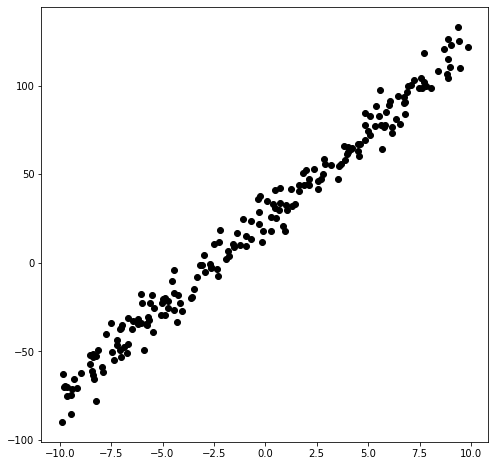

In [121]:
data=data.to_numpy()
x_data = data[:,0]
y_data = data[:,1]
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c='black')
plt.show()



# 2. linear regression result

In [107]:
def linear_model(x,theta_0,theta_1):
    hypothesis=theta_0+theta_1*x
    return hypothesis

def objective_function(x,y,theta_0,theta_1):
    # mean squared error
    return ((linear_model(x,theta_0,theta_1)-y)**2).mean()/2

def gradient_descent(theta_0,theta_1,learning_rate):
    theta_0_=theta_0-learning_rate*((linear_model(x,theta_0,theta_1)-y).sum())
    theta_1_=theta_1-learning_rate*(((linear_model(x,theta_0,theta_1)-y)*x).sum())
    return theta_0_,theta_1_

In [144]:
# theta_0 초기값 10, theta_1 초기값 5
# learning rate 0.01
# until convergence
cost=[]
epochs=100
theta_0=-30
theta_1=-30
Theta_0=[theta_0]
Theta_1=[theta_1]
learning_rate=0.0001
x=x_data.copy()
y=y_data.copy()
for epoch in range(epochs):
    cost.append(objective_function(x,y,theta_0,theta_1))
    theta_0,theta_1=gradient_descent(theta_0,theta_1,learning_rate)
    Theta_0.append(theta_0)
    Theta_1.append(theta_1)

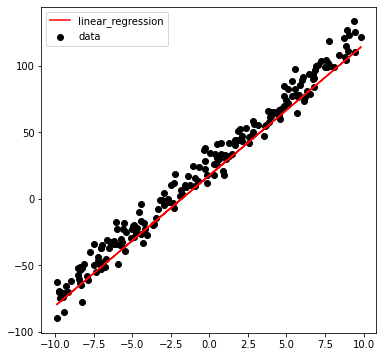

In [145]:
plt.scatter(x_data, y_data, c='black',label='data')
plt.plot(x,theta_0+theta_1*x,'red',label='linear_regression')
plt.legend(loc='best')
plt.show()

# 3. Plot the energy surface

In [128]:
xs = np.linspace(-30,0.1,30)
ys = np.linspace(-30,0.1,30)
X,Y=np.meshgrid(xs,ys)
Z=np.array([[objective_function(x,y,theta__1,theta__2) for theta__1 in xs] for theta__2 in ys])
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,100)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('objective_function')

# 4. Plot the gradient descent on the energy surface

Text(0.5, 0, 'objective_function')

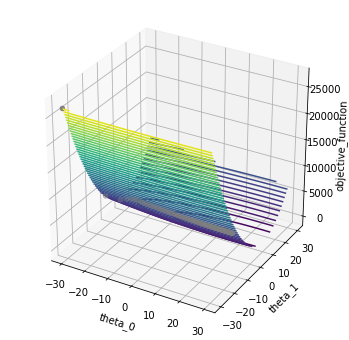

In [155]:
xs = np.linspace(-30,30,30)
ys = np.linspace(-30,30,30)
X,Y=np.meshgrid(xs,ys)
Z=np.array([[objective_function(x,y,theta__1,theta__2) for theta__1 in xs] for theta__2 in ys])
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50)
ax.scatter(Theta_0, Theta_1, [objective_function(x,y,theta_0,theta_1) for theta_0,theta_1 in zip(Theta_0,Theta_1)],c='grey')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('objective_function')